## TMA4215 - Project #2 ## 
*01.11.2024*

*Group ID:*

In this project we will work with image generation and processing.

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML



In [79]:
%config InlineBackend.figure_formats = ['svg'] # Makes the plots svg (visually better)

#### Task 1: Generating artificial images

To start off we will generate artificial fractal images.

#### a)

In [80]:
def my_newton(f, Df, x0, maxiter=100, tol=1e-6):
    '''
    Perform Newton method
    Paramters:
    - f: function
    - Df: derivative of funciton
    - x0: 
    - maxiter: 
    - tol:
    '''
    for _ in range(maxiter):
        x1 = x0 - f(x0) / Df(x0)
        if abs(x1 - x0) < tol:
            return x1
        x0 = x1
    return x0

#### b)

In [81]:
# Grid-based Newton's method
def grid_newton(f, Df, n, maxiter=100):
    '''
    Grid
    Paramteters:
    - f: function
    - Df: derivative of function
    - n:
    - maxiter:
    '''
    x = np.linspace(-1, 1, n)
    y = np.linspace(-1, 1, n)
    X, Y = np.meshgrid(x, y)
    Z = X + 1j * Y
    A = np.zeros(Z.shape, dtype=complex)
    
    for i in range(n):
        for j in range(n):
            A[i, j] = my_newton(f, Df, Z[i, j], maxiter=maxiter)
    return A


#### c)

In [82]:
def g(z):
    return z**3 - 1

def Dg(z):
    return 3 * z**2

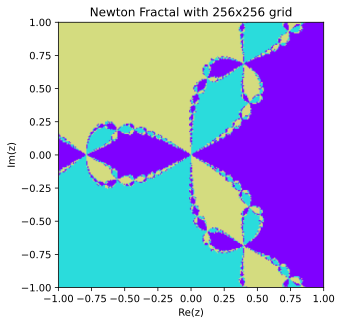

In [83]:
# Function to plot the results
def plot_sol(f, Df, n=256, maxiter=100):
    '''
    Plots the newton fractal for a given funciton and its derivative.

    Parameters:
    - f: function
    - Df: derivative of function
    - n: int, the resolution of the grid

    Returns:
    - 
    
    '''
    roots = [1, np.exp(2j * np.pi / 3), np.exp(4j * np.pi / 3)]
    
    A = grid_newton(f, Df, n, maxiter=maxiter)
    
    # Create an empty array for the color plot
    img = np.zeros((n, n, 3))
    
    for i in range(n):
        for j in range(n):
            z = A[i, j]
            distances = [abs(z - root) for root in roots]
            closest_root = np.argmin(distances)
            img[i, j] = plt.get_cmap('rainbow')(closest_root / 3.0)[:3]  # Using a colormap
    
    plt.imshow(img, extent=(-1, 1, -1, 1))
    plt.title(f'Newton Fractal with {n}x{n} grid')
    plt.xlabel('Re(z)')
    plt.ylabel('Im(z)')
    plt.show()

# Run the plotting function
plot_sol(g, Dg, n=256)


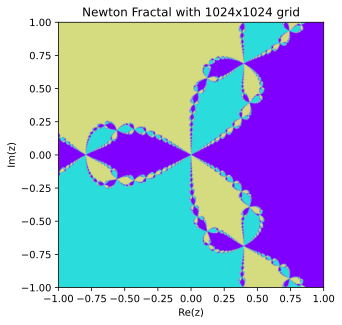

In [49]:
plot_sol(g, Dg, n=1024)

### question that must be answered:
Describe what you observe if you chose n=256(or n=1024 if you dear)
(For n=1024 the immage is a bit smoother?)

#### d)

We are now going to consider $z^{5} = 1$

In [84]:
def plot_angle(f, Df, n=256, maxiter=100):
    '''
    Plot the angle between each point's Newton iteration result and the trivial solution.
    Parameters:
    - f:
    - Df:
    - n:
    - maxiter: 
    '''
    z0 = 1
    A = grid_newton(f, Df, n, maxiter=maxiter)
    
    # Compute the angle between each grid point and the trivial solution
    angles = np.angle(A / z0)
    
    # Normalize the angles to the range [0, 1]
    norm_angles = (angles + np.pi) / (2 * np.pi)  # range [0, 1] since angles are in [-π, π]
    
    # Apply the colormap to the normalized angles
    cmap = plt.get_cmap('rainbow')
    img_colors = cmap(norm_angles)
    
    # Plot the colored image
    plt.imshow(img_colors, extent=(-1, 1, -1, 1))
    plt.title(f'Newton Fractal with {n}x{n} grid after {maxiter} iterations')
    plt.xlabel('Re(z)')
    plt.ylabel('Im(z)')
    plt.show()



In [85]:
def h(z):
    return z**3

def Dh(z):
    return 3*z**2

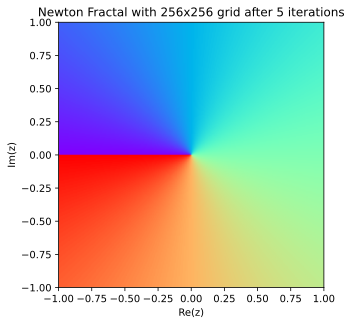

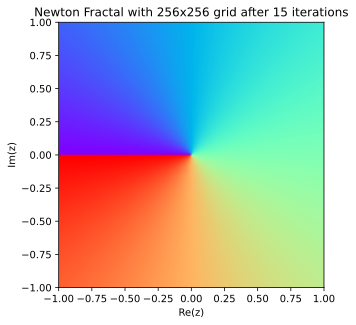

In [86]:
# Plot for k = 5 iterations
plot_angle(h, Dh, n=256, maxiter=5)

# Plot for k = 15 iterations
plot_angle(h, Dh, n=256, maxiter=15)


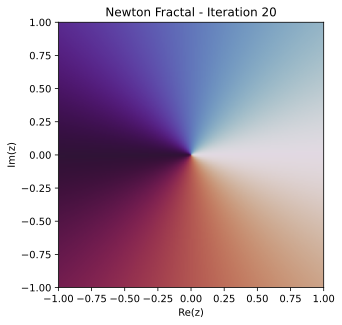

In [77]:
def animate(k):
    A = grid_newton(h, Dh, n, maxiter=k)
    angles = np.angle(A / z0)
    
    # Normalize the angles to the range [0, 1]
    norm_angles = (angles + np.pi) / (2 * np.pi)
    
    # Apply colormap
    img_colors = cmap(norm_angles)
    img.set_array(img_colors)
    ax.set_title(f'Newton Fractal - Iteration {k}')
    return [img]


# Setup for animation
n = 256  # Grid resolution
K = 20  # Maximum number of frames/iterations
z0 = 1  # Reference solution to calculate the angle
cmap = plt.get_cmap('twilight_shifted')  # Choose the colormap

# Initialize the figure
fig, ax = plt.subplots()
A_initial = grid_newton(g, Dg, n, maxiter=0)
angles_initial = np.angle(A_initial / z0)
norm_angles_initial = (angles_initial + np.pi) / (2 * np.pi)
img_colors_initial = cmap(norm_angles_initial)
img = ax.imshow(img_colors_initial, extent=(-1, 1, -1, 1))
ax.set_title('Newton Fractal - Iteration 0')
ax.set_xlabel('Re(z)')
ax.set_ylabel('Im(z)')

# Create the animation
anim = animation.FuncAnimation(fig, animate, frames=range(K + 1), blit=True)

# Display as an HTML5 video inline in the notebook
HTML(anim.to_jshtml())


#### Task 2: Bézier curves and shapes

Now, we will consider shapes in the plane using Bézier curves and Hermite interpolation.

#### a)

#### b)

#### c)

#### d)

#### e)

#### f)

#### g)

#### Task 3: Seamless cloning

Now we want to smoothly embed one image into another, using seamless cloning.

#### a)

#### b)

#### c)

#### d)

#### e)

#### References
- Plonka, Gerlind, Daniel Potts, Gabriele Steidl, and Manfred Tasche (2018). *Numerical Fourier Analysis*. Springer International Publishing.